In [1]:
import numpy as np
import pandas as pd
import sklearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
import random
import matplotlib.pyplot as plt

## 0. Loading DataSet

In [2]:
data_set = np.genfromtxt('magic04.data', delimiter=',', dtype=str) # Data is in the form of array of tuples
data = np.array(data_set[:, 0:len(data_set[0]) - 1]).astype(np.float64)
labels = np.reshape(np.array(data_set[:, len(data_set[0]) - 1:len(data_set[0])]), len(data))
le = LabelEncoder()
labels = le.fit_transform(labels)

# 1. Data Balancing

In [3]:
under_sampler = RandomUnderSampler()
sampled_data, sampled_labels = under_sampler.fit_resample(data, labels)

In [4]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(sampled_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 12332, 1: 6688}
{0: 6688, 1: 6688}


# 2. Data Split


In [5]:
training_data, testing_data, training_labels, testing_labels = train_test_split(sampled_data, sampled_labels, test_size=0.3)

# 3. Classification

In [6]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import math
import random

### (a) Decision Tree

In [7]:
def decision_tree(tr_data, tr_labels, tst_data):
    decision_tree = tree.DecisionTreeClassifier()
    decision_tree_pred = decision_tree.fit(tr_data, tr_labels).predict(tst_data)
    return decision_tree_pred

### (b) AdaBoost

In [8]:
def ada_boost(tr_data, tr_labels, tst_data, n_estimators):
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators)
    ada_boost_pred = ada_boost.fit(tr_data, tr_labels).predict(tst_data)
    return ada_boost_pred
    

### (c) K-Nearest Neighbors (K-NN)

In [9]:
def knn(tr_data, tr_labels, tst_data, k_neighb = 3):
    neigh = KNeighborsClassifier(n_neighbors=k_neighb)
    knn_pred = neigh.fit(tr_data, tr_labels).predict(tst_data)
    return knn_pred

### (d) Random Forests


In [10]:
def random_forests(tr_data, tr_labels, tst_data, n_estimators):
    random_forests = RandomForestClassifier(n_estimators=n_estimators)
    random_forests_pred = random_forests.fit(tr_data, tr_labels).predict(tst_data)
    return random_forests_pred
    

### (e) Na¨ıve Bayes


In [11]:
def naive_bayes(tr_data, tr_labels, tst_data):
    gnb = GaussianNB()
    naive_bayes_pred = gnb.fit(tr_data, tr_labels).predict(tst_data)
    return naive_bayes_pred

# 4. Model Parameter Tuning


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_2d_space(x, y, x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x, y)
    plt.show()

### a) Dicition Tree

In [14]:
def decision_tree_scores(training_data, training_labels, testing_data, testing_labels):
    decision_tree_pred = decision_tree(training_data, training_labels, testing_data)
    accuracy = accuracy_score(testing_labels, decision_tree_pred)
    precision = precision_score(testing_labels, decision_tree_pred, average='weighted')
    recall = recall_score(testing_labels, decision_tree_pred, average='weighted')
    f1 = f1_score(testing_labels, decision_tree_pred, average='weighted')
    return decision_tree_pred, accuracy, precision, recall, f1

### b) Na¨ıve Bayes

In [15]:
def naive_bayes_scores(training_data, training_labels, testing_data, testing_labels):
    naive_bayes_pred = naive_bayes(training_data, training_labels, testing_data)
    accuracy = accuracy_score(testing_labels, naive_bayes_pred)
    precision = precision_score(testing_labels, naive_bayes_pred, average='weighted')
    recall = recall_score(testing_labels, naive_bayes_pred, average='weighted')
    f1 = f1_score(testing_labels, naive_bayes_pred, average='weighted')
    return naive_bayes_pred, accuracy, precision, recall, f1

### c) K-NN

In [16]:
def knn_cross_val_scores(training_data, training_labels, testing_data, testing_labels, k_neighb, num_of_folds, scoring_method):
    cv_scores = []
    best_k_neighb = k_neighb[0]
    for k in k_neighb:
        scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), training_data, training_labels, cv=num_of_folds, scoring=scoring_method)
        cv_scores.append(scores.mean())
        
    # ploting k versus scoring
    plot_2d_space(k_neighb, cv_scores, 'K', scoring_method, 'K-NN versus ' + scoring_method)
    
    best_k_neighb = k_neighb[cv_scores.index(max(cv_scores))]
    knn_pred = knn(training_data, training_labels, testing_data, best_k_neighb)
    
    accuracy = accuracy_score(testing_labels, knn_pred)
    precision = precision_score(testing_labels, knn_pred, average='weighted')
    recall = recall_score(testing_labels, knn_pred, average='weighted')
    f1 = f1_score(testing_labels, knn_pred, average='weighted')
    return knn_pred, best_k_neighb, accuracy, precision, recall, f1

### d) Ada Boost

In [17]:
def ada_boost_cross_val_scores(training_data, training_labels, testing_data, testing_labels, n_estimators, num_of_folds, scoring_method):
    cv_scores = []
    best_n_estimator = n_estimators[0]
    for n in n_estimators:
        scores = cross_val_score(AdaBoostClassifier(n_estimators=n), training_data, training_labels, cv=num_of_folds, scoring=scoring_method)
        cv_scores.append(scores.mean())
        
    # ploting n versus scoring
    plot_2d_space(n_estimators, cv_scores, 'n', scoring_method, 'Ada boost estimator versus ' + scoring_method)
    
    best_n_estimator = n_estimators[cv_scores.index(max(cv_scores))]
    ada_boost_pred = ada_boost(training_data, training_labels, testing_data, best_n_estimator)
    
    accuracy = accuracy_score(testing_labels, ada_boost_pred)
    precision = precision_score(testing_labels, ada_boost_pred, average='weighted')
    recall = recall_score(testing_labels, ada_boost_pred, average='weighted')
    f1 = f1_score(testing_labels, ada_boost_pred, average='weighted')
    return ada_boost_pred, best_n_estimator, accuracy, precision, recall, f1

### e) Random Forests

In [18]:
def random_forests_cross_val_scores(training_data, training_labels, testing_data, testing_labels, n_estimators, num_of_folds, scoring_method):
    cv_scores = []
    best_n_estimator = n_estimators[0]
    for n in n_estimators:
        scores = cross_val_score(RandomForestClassifier(n_estimators=n), training_data, training_labels, cv=num_of_folds, scoring=scoring_method)
        cv_scores.append(scores.mean())
    
    # ploting n versus scoring
    plot_2d_space(n_estimators, cv_scores, 'n', scoring_method, 'Random forests estimator versus ' + scoring_method)
    
    best_n_estimator = n_estimators[cv_scores.index(max(cv_scores))]
    random_forests_pred = random_forests(training_data, training_labels, testing_data, best_n_estimator)
    
    accuracy = accuracy_score(testing_labels, random_forests_pred)
    precision = precision_score(testing_labels, random_forests_pred, average='weighted')
    recall = recall_score(testing_labels, random_forests_pred, average='weighted')
    f1 = f1_score(testing_labels, random_forests_pred, average='weighted')
    return random_forests_pred, best_n_estimator, accuracy, precision, recall, f1

# 5. Report Requirements

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [20]:
num_of_folds = 10
scoring_method = 'accuracy'

### a) Decision Tree

Decision tree accuracy measure:  79.14278594567655 %
Decision tree precision measure:  79.14293657252276 %
Decision tree recall measure:  79.14278594567655 %
Decision tree f1 measure:  79.14281702925041 %


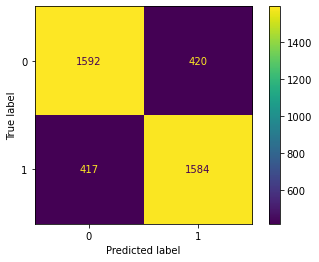

In [21]:
prediction, accuracy, precision, recall, f1 = decision_tree_scores(training_data, training_labels, testing_data, testing_labels)
print("Decision tree accuracy measure: ", accuracy * 100, "%")
print("Decision tree precision measure: ", precision * 100, "%")
print("Decision tree recall measure: ", recall * 100, "%")
print("Decision tree f1 measure: ", f1 * 100, "%")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing_labels, prediction))
disp.plot()
plt.show()


### b) Na¨ıve Bayes

Na¨ıve bayes accuracy measure:  65.16321953650636 %
Na¨ıve bayes precision measure:  69.59639824543653 %
Na¨ıve bayes recall measure:  65.16321953650636 %
Na¨ıve bayes f1 measure:  63.03076919505229 %


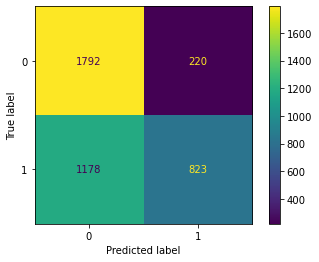

In [22]:
prediction, accuracy, precision, recall, f1 = naive_bayes_scores(training_data, training_labels, testing_data, testing_labels)
print("Na¨ıve bayes accuracy measure: ", accuracy * 100, "%")
print("Na¨ıve bayes precision measure: ", precision * 100, "%")
print("Na¨ıve bayes recall measure: ", recall * 100, "%")
print("Na¨ıve bayes f1 measure: ", f1 * 100, "%")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing_labels, prediction))
disp.plot()
plt.show()

### c) K-NN

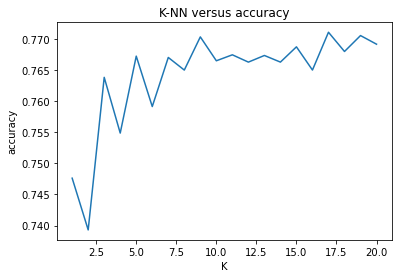

17-NN accuracy measure:  76.85023673062547 %
17-NN precision measure:  77.77899787865488 %
17-NN recall measure:  76.85023673062547 %
17-NN accuracy measure:  76.64684658095402 %


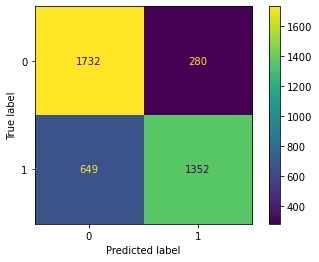

In [23]:
k_neighb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
prediction, best_k_neighb, accuracy, precision, recall, f1 = knn_cross_val_scores(training_data, training_labels, testing_data, testing_labels, k_neighb, num_of_folds, scoring_method)
print(str(best_k_neighb) + "-NN accuracy measure: ", accuracy * 100, "%")
print(str(best_k_neighb) + "-NN precision measure: ", precision * 100, "%")
print(str(best_k_neighb) + "-NN recall measure: ", recall * 100, "%")
print(str(best_k_neighb) + "-NN accuracy measure: ", f1 * 100, "%")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing_labels, prediction))
disp.plot()
plt.show()

### d) Ada Boost

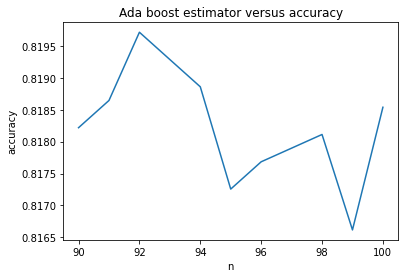

92_estimators AdaBoost accuracy measure:  82.05831049090456 %
92_estimators AdaBoost precision measure:  82.06775186631045 %
92_estimators AdaBoost recall measure:  82.05831049090456 %
92_estimators AdaBoost f1 measure:  82.05642517143728 %


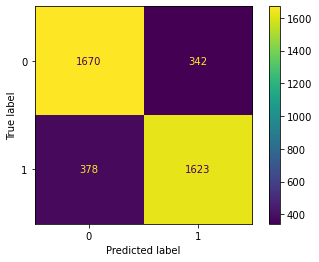

In [24]:
n_estimators = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
prediction, best_n_estimator, accuracy, precision, recall, f1 = ada_boost_cross_val_scores(training_data, training_labels, testing_data, testing_labels, n_estimators, num_of_folds, scoring_method)
print(str(best_n_estimator) + "_estimators AdaBoost accuracy measure: ", accuracy * 100, "%")
print(str(best_n_estimator) + "_estimators AdaBoost precision measure: ", precision * 100, "%")
print(str(best_n_estimator) + "_estimators AdaBoost recall measure: ", recall * 100, "%")
print(str(best_n_estimator) + "_estimators AdaBoost f1 measure: ", f1 * 100, "%")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing_labels, prediction))
disp.plot()
plt.show()

### e) Random Forests

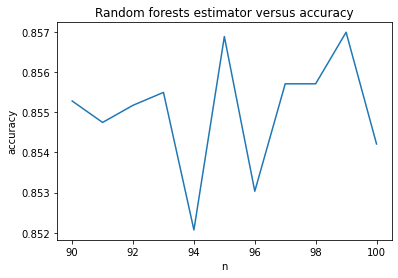

99_estimators random forests accuracy measure:  85.97059556441565 %
99_estimators random forests precision measure:  86.04960673070023 %
99_estimators random forests recall measure:  85.97059556441565 %
99_estimators random forests f1 measure:  85.96181679781877 %


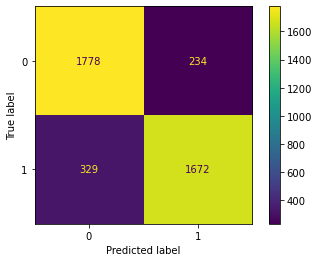

In [25]:
n_estimators = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
prediction, best_n_estimator, accuracy, precision, recall, f1 = random_forests_cross_val_scores(training_data, training_labels, testing_data, testing_labels, n_estimators, num_of_folds, scoring_method)
print(str(best_n_estimator) + "_estimators random forests accuracy measure: ", accuracy * 100, "%")
print(str(best_n_estimator) + "_estimators random forests precision measure: ", precision * 100, "%")
print(str(best_n_estimator) + "_estimators random forests recall measure: ", recall * 100, "%")
print(str(best_n_estimator) + "_estimators random forests f1 measure: ", f1 * 100, "%")

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing_labels, prediction))
disp.plot()
plt.show()

# 6. Bonus

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import preprocessing

In [27]:
EPOCHS = 2000

In [28]:
le = preprocessing.LabelEncoder()
training_encoded_labels = le.fit_transform(training_labels)
testing_encoded_labels = le.fit_transform(testing_labels)

In [29]:
print(f'Training Data Shape {training_data.shape}')
print(f'Training Label Shape {training_encoded_labels.shape}')

Training Data Shape (9363, 10)
Training Label Shape (9363,)


In [30]:
print(f'Training Data  {training_data[0]}')
print(f'Training Label {training_encoded_labels[0]}')

Training Data  [ 1.28627e+02  2.16801e+01  2.77490e+00  2.63600e-01  1.33500e-01
  1.01383e+02  1.28975e+02 -1.15924e+01  3.10730e+00  2.21050e+02]
Training Label 1


In [31]:
X_train_val = torch.from_numpy(training_data).float()
X_test = torch.from_numpy(testing_data).float()
y_train_val = torch.from_numpy(training_encoded_labels).float()
y_test = torch.from_numpy(testing_encoded_labels).float()

In [32]:
print(X_train_val.shape)
print(X_test.shape)

torch.Size([9363, 10])
torch.Size([4013, 10])


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42) 

In [34]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

torch.Size([8426, 10])
torch.Size([937, 10])
torch.Size([4013, 10])


In [35]:
class ClassificationModel(nn.Module):
    def __init__(self, input_layer, hidden_layer_1, hidden_layer_2, output_layer):
        super(ClassificationModel, self).__init__()
        self.l1 = nn.Linear(input_layer, hidden_layer_1)
        self.l2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.out = nn.Linear(hidden_layer_2, output_layer)
 
    def forward(self, data):
        x = self.l1(data)
        x = torch.relu(x)
        x = self.l2(x)
        x = torch.relu(x)
        x = self.out(x)
        return torch.sigmoid(x)
     


In [36]:

def train_eval_model(model, epochs, optimizer, loss_fn, X_train, X_val, y_train, y_val, cross_val=False):
    acc_data_val = []
    acc_data_train = []
    loss_data_val = []
    loss_data_train = []

    for epoch in range(epochs+1):
        optimizer.zero_grad()
        model.train()
        y_pred_train = model(X_train)
        loss_train = loss_fn(y_pred_train, y_train)
        loss_train.backward()
        optimizer.step()

        model.eval()
        y_pred_val = model(X_val)
        loss_val = loss_fn(y_pred_val, y_val)
        condition = y_pred_val >= 0.5
        y_pred_val = torch.where(condition, 1, 0)
        val_acc = torch.sum(y_pred_val == y_val) / len(y_val)

        condition = y_pred_train >= 0.5
        y_pred_train = torch.where(condition, 1, 0)
        train_acc = torch.sum(y_pred_train == y_train) / len(y_train)
        if epoch % 250 == 0 and not cross_val:
            print(f'{epoch} : Training loss {loss_train} && Training Acc is {train_acc} || Val loss {loss_val} && Val Acc is {val_acc}')
        acc_data_val.append(val_acc)
        acc_data_train.append(train_acc)
        loss_data_val.append(loss_val.detach().numpy())
        loss_data_train.append(loss_train.detach().numpy())

    return np.array(acc_data_train), np.array(acc_data_val), np.array(loss_data_train), np.array(loss_data_val)
            

In [37]:
model_1 = ClassificationModel(10, 16, 32, 1)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=1e-4)
acc_data_train_1, acc_data_val_1, loss_data_train_1, loss_data_val_1 = train_eval_model(model_1, 2000, optimizer, loss_fn, X_train, X_val, y_train.reshape(-1, 1), y_val.reshape(-1, 1))

0 : Training loss 1.1051414012908936 && Training Acc is 0.3251839578151703 || Val loss 1.0758235454559326 && Val Acc is 0.34258270263671875
250 : Training loss 0.5750473737716675 && Training Acc is 0.7042487263679504 || Val loss 0.59349125623703 && Val Acc is 0.6915688514709473
500 : Training loss 0.5269174575805664 && Training Acc is 0.7305957674980164 || Val loss 0.5384220480918884 && Val Acc is 0.7171825170516968
750 : Training loss 0.4982573986053467 && Training Acc is 0.7451934218406677 || Val loss 0.5108832716941833 && Val Acc is 0.7246531248092651
1000 : Training loss 0.4767354726791382 && Training Acc is 0.7557560205459595 || Val loss 0.4931839406490326 && Val Acc is 0.7427961826324463
1250 : Training loss 0.46118614077568054 && Training Acc is 0.7646570205688477 || Val loss 0.480143666267395 && Val Acc is 0.7470651268959045
1500 : Training loss 0.448306143283844 && Training Acc is 0.7746261358261108 || Val loss 0.47027838230133057 && Val Acc is 0.7481323480606079
1750 : Traini

In [38]:
model_2 = ClassificationModel(10, 64, 128, 1)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=1e-4)
acc_data_train_2, acc_data_val_2, loss_data_train_2, loss_data_val_2 = train_eval_model(model_2, 2000, optimizer, loss_fn, X_train, X_val, y_train.reshape(-1, 1), y_val.reshape(-1, 1))

0 : Training loss 2.789121150970459 && Training Acc is 0.4991692304611206 || Val loss 2.6691348552703857 && Val Acc is 0.5016008615493774
250 : Training loss 0.5064537525177002 && Training Acc is 0.7418704032897949 || Val loss 0.5214170217514038 && Val Acc is 0.7150480151176453
500 : Training loss 0.47182953357696533 && Training Acc is 0.7576549053192139 || Val loss 0.4884296655654907 && Val Acc is 0.7417289018630981
750 : Training loss 0.44782203435897827 && Training Acc is 0.773914098739624 || Val loss 0.4661791920661926 && Val Acc is 0.7502667903900146
1000 : Training loss 0.42957401275634766 && Training Acc is 0.7912414073944092 || Val loss 0.45200416445732117 && Val Acc is 0.7630736231803894
1250 : Training loss 0.4147481918334961 && Training Acc is 0.800379753112793 || Val loss 0.4405764043331146 && Val Acc is 0.7716115117073059
1500 : Training loss 0.4026476740837097 && Training Acc is 0.8117730617523193 || Val loss 0.43085846304893494 && Val Acc is 0.7780149579048157
1750 : Tra

In [39]:
model_3 = ClassificationModel(10, 128, 512, 1)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=1e-4)
acc_data_train_3, acc_data_val_3, loss_data_train_3, loss_data_val_3 = train_eval_model(model_3, 2000, optimizer, loss_fn, X_train, X_val, y_train.reshape(-1, 1), y_val.reshape(-1, 1))

0 : Training loss 2.6748061180114746 && Training Acc is 0.5045098662376404 || Val loss 1.8096976280212402 && Val Acc is 0.527214527130127
250 : Training loss 0.4582293927669525 && Training Acc is 0.7671493291854858 || Val loss 0.47681164741516113 && Val Acc is 0.7374599575996399
500 : Training loss 0.4224357306957245 && Training Acc is 0.7911227345466614 || Val loss 0.4501187801361084 && Val Acc is 0.7588046789169312
750 : Training loss 0.39528074860572815 && Training Acc is 0.8102302551269531 || Val loss 0.4288313686847687 && Val Acc is 0.7876200675964355
1000 : Training loss 0.3718952536582947 && Training Acc is 0.8288630247116089 || Val loss 0.4106120467185974 && Val Acc is 0.802561342716217
1250 : Training loss 0.3552120327949524 && Training Acc is 0.8370519876480103 || Val loss 0.4027184545993805 && Val Acc is 0.802561342716217
1500 : Training loss 0.343109130859375 && Training Acc is 0.8447661995887756 || Val loss 0.40032050013542175 && Val Acc is 0.8078975677490234
1750 : Traini

In [40]:
def plot_acc_loss(acc_data_train, acc_data_val, loss_data_train, loss_data_val):
    x_axis = range(0, EPOCHS+1)
    fig, axs = plt.subplots(1, 2, figsize=[18, 5])
    
    axs[0].plot(x_axis, acc_data_train, '--', color="r",  label="Training score")
    axs[0].plot(x_axis, acc_data_val, color="b", label="Cross-validation score")
    axs[0].set_title("Accuracy Curve")
    axs[0].set_xlabel("Training Set Size")
    axs[0].set_ylabel("Accuracy Score"), plt.legend(loc="best")
    axs[0].legend()
    
    axs[1].plot(x_axis, loss_data_train, '--', color="r",  label="Training loss")
    axs[1].plot(x_axis, loss_data_val, color="b", label="Cross-validation loss")
    axs[1].set_title("Loss Curve")
    axs[1].set_xlabel("Training Set Size")
    axs[1].set_ylabel("Loss Score"), plt.legend(loc="best")
    axs[1].legend()
    plt.show()

No handles with labels found to put in legend.


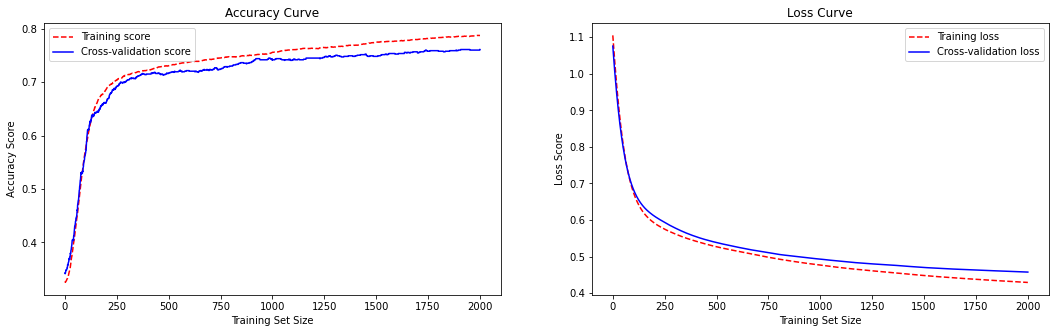

In [41]:
plot_acc_loss(acc_data_train_1, acc_data_val_1, loss_data_train_1, loss_data_val_1)

No handles with labels found to put in legend.


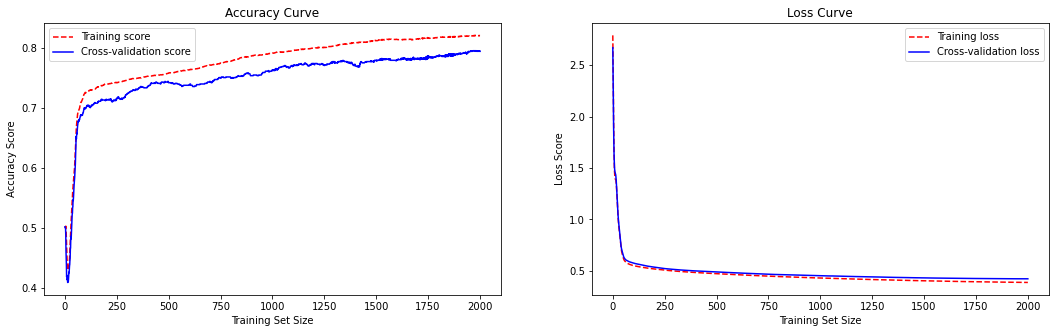

In [42]:
plot_acc_loss(acc_data_train_2, acc_data_val_2, loss_data_train_2, loss_data_val_2)

No handles with labels found to put in legend.


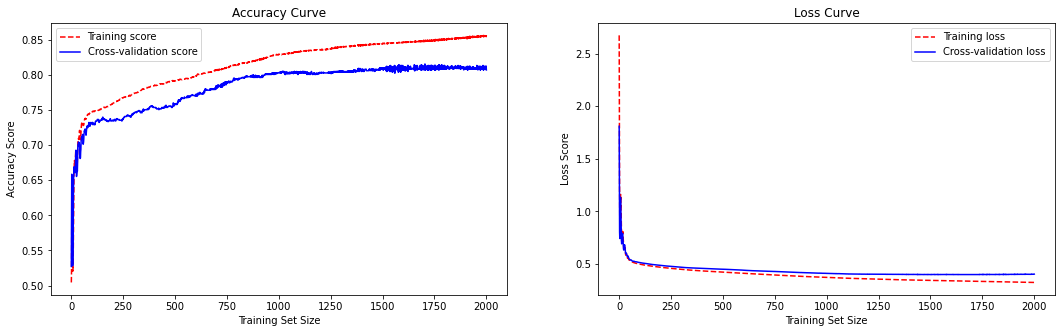

In [43]:
plot_acc_loss(acc_data_train_3, acc_data_val_3, loss_data_train_3, loss_data_val_3)

In [44]:
def evalute_test(model, X_test, y_test):
    model.eval()
    y_pred_test = model(X_test)
    cond = y_pred_test >= 0.5
    y_pred_test = torch.where(cond, 1, 0)
    train_acc = torch.sum(y_pred_test == y_test) / len(y_test)
    print(f"Model Acc. on Test Data {train_acc}")

In [45]:
evalute_test(model_1, X_test, y_test.reshape(-1, 1))
evalute_test(model_2, X_test, y_test.reshape(-1, 1))
evalute_test(model_3, X_test, y_test.reshape(-1, 1))

Model Acc. on Test Data 0.7717418670654297
Model Acc. on Test Data 0.7934213876724243
Model Acc. on Test Data 0.7976576089859009


In [46]:
y_list = torch.chunk(y_train_val, 10)
x_list = torch.chunk(X_train_val, 10)

In [47]:
x_list[0].shape

torch.Size([937, 10])

In [48]:
def get_val_train(data, ind):
    val = data[ind]
    train = torch.Tensor()
    for i in range(len(data)):
        if i != ind:
            train = torch.cat((train, data[i]), dim=0)

    return train, val

In [49]:
param = [
    [16, 32],
    [32, 64],
    [64, 128],
    [128, 256],
    [256, 512],
]

In [52]:
def kfold(param, x_list, y_list, k, ephocs):
    best_loss_val = float('inf')
    best_acc_val = 0
    best_acc_train = 0
    best_loss_train = 0
    best_model = None
    for p in param:
        model =  ClassificationModel(10, p[0], p[1], 1)
        loss_fn = nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
        total_loss_val = 0
        total_loss_train = 0
        total_acc_val = 0
        total_acc_train = 0
        for i in range(k):
            x_t, x_v = get_val_train(x_list, i)
            y_t, y_v = get_val_train(y_list, i)
            acc_data_train, acc_data_val, loss_data_train, loss_data_val = train_eval_model(model, ephocs, optimizer, loss_fn, x_t, x_v, y_t.reshape(-1, 1), y_v.reshape(-1, 1), cross_val=True)
            total_loss_train += np.sum(loss_data_train, axis=0) / ephocs
            total_loss_val += np.sum(loss_data_val, axis=0) / ephocs
            total_acc_train += np.sum(acc_data_train, axis=0) / ephocs
            total_acc_val += np.sum(acc_data_val, axis=0) / ephocs
        print(f'Using {p[0]},{p[1]} Training loss {total_loss_train / k} && Training Acc  {total_acc_train / k} || Val loss {total_loss_val / k} && Val Acc {total_acc_val / k}')
        if best_loss_val > total_loss_val / k:
            best_model = model
            best_loss_val = total_loss_val / k
            best_acc_val = total_acc_val / k
            best_loss_train = total_loss_train / k
            best_acc_train = total_acc_train / k
    return best_model, best_acc_train, best_loss_train, best_acc_val, best_loss_val


In [53]:
bestm, best_acc_train, best_loss_train, best_acc_val, best_loss_val = kfold(param, x_list, y_list, 10, 2000)

Using 16,32 Training loss 0.4677059844970703 && Training Acc  0.7634268981933594 || Val loss 0.47481229248046863 && Val Acc 0.7597416625976563
Using 32,64 Training loss 0.4719085327148438 && Training Acc  0.7746093566894532 || Val loss 0.4761168823242189 && Val Acc 0.7713938720703125
Using 64,128 Training loss 0.3894585052490234 && Training Acc  0.8155783264160157 || Val loss 0.40973772277832027 && Val Acc 0.8023849426269531


In [ ]:
print(f'Best Model parameters :  {bestm.parameters}')

Best Model parameters :  <bound method Module.parameters of ClassificationModel(
  (l1): Linear(in_features=10, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=1, bias=True)
)>


In [ ]:
evalute_test(bestm, X_test, y_test.reshape(-1, 1))

Model Acc. on Test Data 0.8284262418746948


### Scaling Data